# Data Aggregation and Group Operations

In [24]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [25]:
pd.options.display.notebook_repr_html = False

In [26]:
%matplotlib inline

In [27]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## GroupBy mechanics

In [28]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randint(10, size=5),
                'data2' : np.random.randint(10, size=5)})
df

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

In [29]:
dir(df)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',


In [30]:
grouped = df['data1'].groupby(df['key1'])
grouped
grouped2 = df.data1.groupby(df.key1)
grouped2    

In [31]:
df['data1']
df.data1
df[['data1']].groupby(df.key1)

0    2
1    5
2    1
3    4
4    9
Name: data1, dtype: int32

0    2
1    5
2    1
3    4
4    9
Name: data1, dtype: int32

In [32]:
df['key1']
df.key1

0    a
1    a
2    b
3    b
4    a
Name: key1, dtype: object

0    a
1    a
2    b
3    b
4    a
Name: key1, dtype: object

In [33]:
grouped.mean()        # grouped 그룹 객체의 집계함수 . 각각의 그룹에 대해서 평균을 구해라.

key1
a    5.333333
b    2.500000
Name: data1, dtype: float64

In [34]:
[df.key1, df.key2]    # 시리즈가 2개 (시리즈의 리스트)

[0    a
 1    a
 2    b
 3    b
 4    a
 Name: key1, dtype: object, 0    one
 1    two
 2    one
 3    two
 4    one
 Name: key2, dtype: object]

In [35]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
                            # 시리즈 2개를 리스트로 묶어서 넣어주면. 그룹 기준이 되는 키가 2개인 것이고
                                                     # 바로 그 결과에 평균을 계산해버림
        
        
means2 = df.data1.groupby([df.key1, df.key2]).mean()
          # [ ] 대신 점을 이용해서 

means
means2     # a one, two  / b one, two   => 4개로 나뉘어짐.

key1  key2
a     one     5.5
      two     5.0
b     one     1.0
      two     4.0
Name: data1, dtype: float64

key1  key2
a     one     5.5
      two     5.0
b     one     1.0
      two     4.0
Name: data1, dtype: float64

In [36]:
means.unstack()  # 아래서 위로!

key2  one  two
key1          
a     5.5  5.0
b     1.0  4.0

In [37]:
df
# 넘파이 배열로 준비 state, years
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])  
years = np.array([2005, 2005, 2006, 2005, 2006])
                 # Ohio California 별로 묶어서 평균을 내겠다.
df['data1'].groupby([states, years]).mean()

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

California  2005    5
            2006    1
Ohio        2005    3
            2006    9
Name: data1, dtype: int32

In [39]:
df.groupby('key1').mean()     # a의 경우 / b의 경우

         data1     data2
key1                    
a     5.333333  2.666667
b     2.500000  3.500000

In [41]:
df.groupby(['key1', 'key2']).mean()

           data1  data2
key1 key2              
a    one     5.5    3.0
     two     5.0    2.0
b    one     1.0    1.0
     two     4.0    6.0

In [42]:
df.groupby(['key1', 'key2']).size() # sql count 와 같아서 데이터의 갯수, 크기를 알려줌.

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### Iterating over groups             그룹에 대해서 반복 설계하는 것

In [43]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
4      9      1    a  one
b
   data1  data2 key1 key2
2      1      1    b  one
3      4      6    b  two


In [44]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)
    print()

('a', 'one')
   data1  data2 key1 key2
0      2      5    a  one
4      9      1    a  one

('a', 'two')
   data1  data2 key1 key2
1      5      2    a  two

('b', 'one')
   data1  data2 key1 key2
2      1      1    b  one

('b', 'two')
   data1  data2 key1 key2
3      4      6    b  two



In [45]:
for k, group in df.groupby(['key1', 'key2']):
    print(k)    # 튜플을 인쇄
    print(group)
    print()

('a', 'one')
   data1  data2 key1 key2
0      2      5    a  one
4      9      1    a  one

('a', 'two')
   data1  data2 key1 key2
1      5      2    a  two

('b', 'one')
   data1  data2 key1 key2
2      1      1    b  one

('b', 'two')
   data1  data2 key1 key2
3      4      6    b  two



In [46]:
list(df.groupby('key1'))

[('a',    data1  data2 key1 key2
  0      2      5    a  one
  1      5      2    a  two
  4      9      1    a  one), ('b',    data1  data2 key1 key2
  2      1      1    b  one
  3      4      6    b  two)]

In [47]:
pieces = dict(list(df.groupby('key1')))
            # key1으로 그룹화 한다음에 리스트로 만들고
pieces
pieces['b']

{'a':    data1  data2 key1 key2
 0      2      5    a  one
 1      5      2    a  two
 4      9      1    a  one, 'b':    data1  data2 key1 key2
 2      1      1    b  one
 3      4      6    b  two}

   data1  data2 key1 key2
2      1      1    b  one
3      4      6    b  two

In [48]:
df.groupby('key1')
list(df.groupby('key1'))
dict(list(df.groupby('key1')))

[('a',    data1  data2 key1 key2
  0      2      5    a  one
  1      5      2    a  two
  4      9      1    a  one), ('b',    data1  data2 key1 key2
  2      1      1    b  one
  3      4      6    b  two)]

{'a':    data1  data2 key1 key2
 0      2      5    a  one
 1      5      2    a  two
 4      9      1    a  one, 'b':    data1  data2 key1 key2
 2      1      1    b  one
 3      4      6    b  two}

In [49]:
dict(df.groupby('key1'))
# 그룹바이 한 key1을 사전으로.. / 그룹바이를 바로 처리할 수 있는 사전은 없음

TypeError: attribute of type 'str' is not callable

In [53]:
df.dtypes        # 정수형 / object 타입
type(df.dtypes)

data1     int32
data2     int32
key1     object
key2     object
dtype: object

pandas.core.series.Series

In [54]:
df
grouped = df.groupby(df.dtypes, axis=1)     # axis =1 / int형 2 5 / objec a one 으로 묶어짐
dict(list(grouped))
         # dtype('O')

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

{dtype('int32'):    data1  data2
 0      2      5
 1      5      2
 2      1      1
 3      4      6
 4      9      1, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

In [55]:
s1 = df.dtypes[[3, 0, 1, 2]]; s1

key2     object
data1     int32
data2     int32
key1     object
dtype: object

In [ ]:
grouped2 = df.groupby(s1, axis=1)
df
dict(list(grouped))

### Selecting a column or subset of columns

In [57]:
df.groupby('key1')['data1']          # key1으로 그룹바이 한 다음에  data1 은 SeriesGroupBy 객체
df.groupby('key1')[['data2']]        #                              [[  ]] DataFrameGroupBy 객체

In [58]:
df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

In [59]:
df.groupby(['key1', 'key2'])[['data2']].mean()

           data2
key1 key2       
a    one       3
     two       2
b    one       1
     two       6

In [60]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped

In [61]:
s_grouped.mean()

key1  key2
a     one     3
      two     2
b     one     1
      two     6
Name: data2, dtype: int32

### Grouping with dicts and Series

In [62]:
people = DataFrame(np.random.randint(3, size=(5, 5)),
                   columns=['a', 'b', 'c', 'd', 'e'],
                  )
people.loc[2:3, ['b', 'c']] = np.nan # Add a few NA values
people

   a    b    c  d  e
0  2  1.0  2.0  0  2
1  1  1.0  2.0  1  2
2  2  NaN  NaN  1  1
3  0  NaN  NaN  0  1
4  2  1.0  1.0  2  1

In [63]:
people = DataFrame(np.random.randint(3, size=(5, 5)),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis']
                  )
people.loc[2:3, ['b', 'c']] = np.nan # Add a few NA values
people

        a    b    c  d  e
Joe     0  1.0  2.0  0  1
Steve   0  2.0  0.0  2  0
Wes     0  NaN  NaN  0  2
Jim     0  0.0  2.0  1  2
Travis  2  2.0  1.0  2  2

In [64]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'
          }
mapping

{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [66]:
by_column = people.groupby(mapping, axis=1)
list(by_column)

[('blue',           c  d
  Joe     2.0  0
  Steve   0.0  2
  Wes     NaN  0
  Jim     2.0  1
  Travis  1.0  2), ('red',         a    b  e
  Joe     0  1.0  1
  Steve   0  2.0  0
  Wes     0  NaN  2
  Jim     0  0.0  2
  Travis  2  2.0  2)]

In [65]:
by_column.sum()

[('blue',           c  d
  Joe     2.0  0
  Steve   0.0  2
  Wes     NaN  0
  Jim     2.0  1
  Travis  1.0  2), ('red',         a    b  e
  Joe     0  1.0  1
  Steve   0  2.0  0
  Wes     0  NaN  2
  Jim     0  0.0  2
  Travis  2  2.0  2)]

        blue  red
Joe      2.0  2.0
Steve    2.0  2.0
Wes      0.0  2.0
Jim      3.0  2.0
Travis   3.0  6.0

In [67]:
map_series = Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [68]:
people.groupby(map_series, axis=1) .count()
people.groupby(map_series, axis=1).sum()

        blue  red
Joe        2    3
Steve      2    3
Wes        1    2
Jim        2    3
Travis     2    3

        blue  red
Joe      2.0  2.0
Steve    2.0  2.0
Wes      0.0  2.0
Jim      3.0  2.0
Travis   3.0  6.0

### Grouping with functions

In [69]:
people

people.groupby(len).sum()
people.T.groupby(len, axis=1).sum()

        a    b    c  d  e
Joe     0  1.0  2.0  0  1
Steve   0  2.0  0.0  2  0
Wes     0  NaN  NaN  0  2
Jim     0  0.0  2.0  1  2
Travis  2  2.0  1.0  2  2

   a    b    c  d  e
3  0  1.0  4.0  1  5
5  0  2.0  0.0  2  0
6  2  2.0  1.0  2  2

     3    5    6
a  0.0  0.0  2.0
b  1.0  2.0  2.0
c  4.0  0.0  1.0
d  1.0  2.0  2.0
e  5.0  0.0  2.0

In [70]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

       a    b    c  d  e
3 one  0  1.0  2.0  0  1
  two  0  0.0  2.0  1  2
5 one  0  2.0  0.0  2  0
6 two  2  2.0  1.0  2  2

In [71]:
people.groupby([len, 'd']).min()

     a    b    c  e
  d                
3 0  0  1.0  2.0  1
  1  0  0.0  2.0  2
5 2  0  2.0  0.0  0
6 2  2  2.0  1.0  2

### Grouping by index levels

In [72]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]], names=['cty', 'tenor'])
columns
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

MultiIndex(levels=[['JP', 'US'], [1, 3, 5]],
           labels=[[1, 1, 1, 0, 0], [0, 1, 2, 0, 1]],
           names=['cty', 'tenor'])

cty          US                            JP          
tenor         1         3         5         1         3
0      1.808867 -1.105941  0.344533  1.553014  0.547801
1      0.256437 -1.512917 -0.878108 -0.017276 -0.136594
2     -0.730109  1.398268 -0.336922 -0.004680 -0.760234
3     -1.246113  0.278846 -0.473200 -1.742125 -0.968082

In [73]:
hier_df.groupby(level='cty', axis=1).count()

cty  JP  US
0     2   3
1     2   3
2     2   3
3     2   3

## Data aggregation

In [74]:
df

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

In [ ]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.5)
grouped.quantile(0.9)['data1']

In [75]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
list(grouped)
grouped.agg(peak_to_peak)    # alias for aggregate()
grouped.aggregate(peak_to_peak)

[(dtype('int32'),    data1  data2
  0      2      5
  1      5      2
  2      1      1
  3      4      6
  4      9      1), (dtype('O'),   key1 key2
  0    a  one
  1    a  two
  2    b  one
  3    b  two
  4    a  one)]

TypeError: ("unsupported operand type(s) for -: 'str' and 'str'", 'occurred at index 0')

In [77]:
grouped.describe()

              25%  50%  75% count freq  max mean  min      std  top unique
int32  data1    2    4    5     5  NaN    9  4.2    1  3.11448  NaN    NaN
       data2    1    2    5     5  NaN    6    3    1  2.34521  NaN    NaN
object key1   NaN  NaN  NaN     5    3  NaN  NaN  NaN      NaN    a      2
       key2   NaN  NaN  NaN     5    3  NaN  NaN  NaN      NaN  one      2

In [78]:
tips = pd.read_csv('ch08/tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

   total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808
5       25.29  4.71    Male     No  Sun  Dinner     4  0.186240

### Column-wise and multiple function application

In [79]:
grouped = tips.groupby(['sex', 'smoker'])
for (sex, smoker), group in grouped:
    print(sex, smoker)
    print(group)

Female No
     total_bill   tip     sex smoker   day    time  size   tip_pct
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808
11        35.26  5.00  Female     No   Sun  Dinner     4  0.141804
14        14.83  3.02  Female     No   Sun  Dinner     2  0.203641
16        10.33  1.67  Female     No   Sun  Dinner     3  0.161665
18        16.97  3.50  Female     No   Sun  Dinner     3  0.206246
21        20.29  2.75  Female     No   Sat  Dinner     2  0.135535
22        15.77  2.23  Female     No   Sat  Dinner     2  0.141408
29        19.65  3.00  Female     No   Sat  Dinner     2  0.152672
32        15.06  3.00  Female     No   Sat  Dinner     2  0.199203
33        20.69  2.45  Female     No   Sat  Dinner     4  0.118415
37        16.93  3.07  Female     No   Sat  Dinner     3  0.181335
51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
52        34.81  5.20  Female     No   Sun  Dinner  

In [81]:
grouped_pct = grouped['tip_pct']
grouped['tip_pct'].mean()        # 평균 낸것이
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [82]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

                   mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [84]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)]) # 튜플 
                   # mean 을 foo 이름으로 / np.std(표준편차)를 bar 로 해달라.  

                    foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [87]:
functions = ['count', 'mean', 'max']   # 갯수 / 
              
result = grouped['tip_pct', 'total_bill'].agg(functions)
            # 그룹 객체에 함수가 여러개 
result


# 남성이 지불을 좀 더 하고
# 이상치 

              tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [86]:
result['tip_pct']

               count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [88]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
             # 평균                      # 분산

grouped['tip_pct', 'total_bill'].agg(ftuples)

                   tip_pct              total_bill           
              Durchschnitt Abweichung Durchschnitt Abweichung
sex    smoker                                                
Female No         0.156921   0.001327    18.105185  53.092422
       Yes        0.182150   0.005126    17.977879  84.451517
Male   No         0.160669   0.001751    19.791237  76.152961
       Yes        0.152771   0.008206    22.284500  98.244673

In [90]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})
# 성별과 흡연 유무로 그룹화한 객체

                tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [91]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

                tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

### Returning aggregated data in "unindexed" form

In [92]:
tips.groupby(['sex', 'smoker'], as_index=False).mean()

      sex smoker  total_bill       tip      size   tip_pct
0  Female     No   18.105185  2.773519  2.592593  0.156921
1  Female    Yes   17.977879  2.931515  2.242424  0.182150
2    Male     No   19.791237  3.113402  2.711340  0.160669
3    Male    Yes   22.284500  3.051167  2.500000  0.152771

## 여성 비흡연자/흡연자, 남성 비흡연자/흡연자 별 평균 팁 비율을 막대그래프로, 여성/남성 흡연/비흡연자의 음식값과 팁 비율에 대한 산포도로 나타내 보세요

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

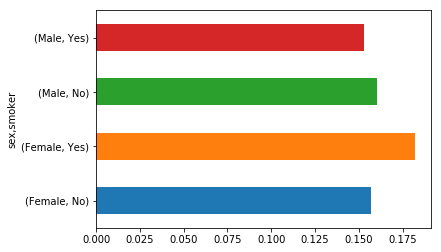

In [94]:
#grouped_pct.mean().plot(kind='bar')
tips.groupby(['sex', 'smoker'])['tip_pct'].mean().plot(kind='barh')

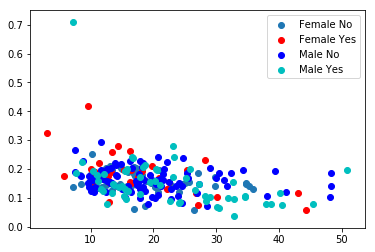

In [97]:
tip_f = tips[tips['sex'] == 'Female']
tip_fn = tip_f[tip_f['smoker'] == 'No']
tip_fy = tip_f[tip_f['smoker'] == 'Yes']
tip_m = tips[tips['sex'] == 'Male']
tip_mn = tip_m[tip_m['smoker'] == 'No']
tip_my = tip_m[tip_m['smoker'] == 'Yes']

plt.scatter(tip_fn['total_bill'], tip_fn['tip_pct'], label='Female No');
plt.scatter(tip_fy['total_bill'], tip_fy['tip_pct'], label='Female Yes', color='r');
plt.scatter(tip_mn['total_bill'], tip_mn['tip_pct'], label='Male No', color='b');
plt.scatter(tip_my['total_bill'], tip_my['tip_pct'], label='Male Yes', color='c');
plt.legend(loc='best');

# 음식값 (x)에 따른 tip(y) 비율 의 분포

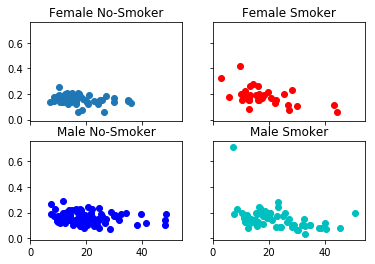

In [98]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
axes = axes.flatten()

tip_f = tips[tips['sex'] == 'Female']
tip_fn = tip_f[tip_f['smoker'] == 'No']
tip_fy = tip_f[tip_f['smoker'] == 'Yes']
tip_m = tips[tips['sex'] == 'Male']
tip_mn = tip_m[tip_m['smoker'] == 'No']
tip_my = tip_m[tip_m['smoker'] == 'Yes']

axes[0].set_title('Female No-Smoker')
axes[0].scatter(tip_fn['total_bill'], tip_fn['tip_pct'], label='Female No');
axes[1].set_title('Female Smoker')
axes[1].scatter(tip_fy['total_bill'], tip_fy['tip_pct'], label='Female Yes', color='r');
axes[2].set_title('Male No-Smoker')
axes[2].scatter(tip_mn['total_bill'], tip_mn['tip_pct'], label='Male No', color='b');
axes[3].set_title('Male Smoker')
axes[3].scatter(tip_my['total_bill'], tip_my['tip_pct'], label='Male Yes', color='c');

## Group-wise operations and transformations

In [99]:
df

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

In [102]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')   # 가져와서 주르륵
k1_means  

      mean_data1  mean_data2
key1                        
a       5.333333    2.666667
b       2.500000    3.500000

In [104]:
pd.merge(df, k1_means, left_on='key1', right_index=True)   # 
   # 머지  컬럼이름으로 조인하는 것   
   # 조인  인덱스로 하는 것

# 두 테이블을 조인하면 컬럼이 늘어남. # 중복된 데이터가 발생함. = 공간차지하는 등...

   data1  data2 key1 key2  mean_data1  mean_data2
0      2      5    a  one    5.333333    2.666667
1      5      2    a  two    5.333333    2.666667
4      9      1    a  one    5.333333    2.666667
2      1      1    b  one    2.500000    3.500000
3      4      6    b  two    2.500000    3.500000

In [105]:
people

        a    b    c  d  e
Joe     0  1.0  2.0  0  1
Steve   0  2.0  0.0  2  0
Wes     0  NaN  NaN  0  2
Jim     0  0.0  2.0  1  2
Travis  2  2.0  1.0  2  2

In [106]:
key = ['one', 'two', 'one', 'two', 'one']    # one one one two two    #index(row)
                                            # 조 웨스 트레비스 / 스티브 짐
people.groupby(key).mean()
#2/3 ...                      # 집계 = 그룹별로

            a    b    c         d         e
one  0.666667  1.5  1.5  0.666667  1.666667
two  0.000000  1.0  1.0  1.500000  1.000000

In [108]:
list(people.groupby(key))                # 그룹으로 나눠서 
people.groupby(key).transform(np.mean)   # 5건 다 나오고 평균 값이 원, 투 별로 들어감.

[('one',         a    b    c  d  e
  Joe     0  1.0  2.0  0  1
  Wes     0  NaN  NaN  0  2
  Travis  2  2.0  1.0  2  2), ('two',        a    b    c  d  e
  Steve  0  2.0  0.0  2  0
  Jim    0  0.0  2.0  1  2)]

               a    b    c         d         e
Joe     0.666667  1.5  1.5  0.666667  1.666667
Steve   0.000000  1.0  1.0  1.500000  1.000000
Wes     0.666667  1.5  1.5  0.666667  1.666667
Jim     0.000000  1.0  1.0  1.500000  1.000000
Travis  0.666667  1.5  1.5  0.666667  1.666667

In [109]:
def demean(arr):  # 사용자 정의함수 정의
    return arr - arr.mean()
       # 데이터프레임 - 데프의 평균을 모든 원소에다가
demeaned = people.groupby(key).transform(demean)
demeaned                                #

               a    b    c         d         e
Joe    -0.666667 -0.5  0.5 -0.666667 -0.666667
Steve   0.000000  1.0 -1.0  0.500000 -1.000000
Wes    -0.666667  NaN  NaN -0.666667  0.333333
Jim     0.000000 -1.0  1.0 -0.500000  1.000000
Travis  1.333333  0.5 -0.5  1.333333  0.333333

In [113]:
demeaned.groupby(key)
demeaned.groupby(key).mean()

                a    b    c             d             e
one  7.401487e-17  0.0  0.0  7.401487e-17 -7.401487e-17
two  0.000000e+00  0.0  0.0  0.000000e+00  0.000000e+00

### Apply: General split-apply-combine

In [114]:
tips[:10]       # 음식점 팁 관련 자료

   total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808
5       25.29  4.71    Male     No  Sun  Dinner     4  0.186240
6        8.77  2.00    Male     No  Sun  Dinner     2  0.228050
7       26.88  3.12    Male     No  Sun  Dinner     4  0.116071
8       15.04  1.96    Male     No  Sun  Dinner     2  0.130319
9       14.78  3.23    Male     No  Sun  Dinner     2  0.218539

In [115]:
def top(df, n=5, column='tip_pct'):             # 팁 퍼센트 컬럼을 기준으로 정렬한다.
    #return df.sort_index(by=column)[-n:]
    return df.sort_values(by=column)[-n:]
         #데이터프레임의 소트밸류즈 / 디폴트값 n = 5 / column    / by = 어떤 컬럼을 기준으로 정렬할 것인가? 
    # sort_values = 축에 따라 값으로 정렬 / 기본값 axis 0 / 
top(tips, n=6)

     total_bill   tip     sex smoker  day    time  size   tip_pct
109       14.31  4.00  Female    Yes  Sat  Dinner     2  0.279525
183       23.17  6.50    Male    Yes  Sun  Dinner     4  0.280535
232       11.61  3.39    Male     No  Sat  Dinner     2  0.291990
67         3.07  1.00  Female    Yes  Sat  Dinner     1  0.325733
178        9.60  4.00  Female    Yes  Sun  Dinner     2  0.416667
172        7.25  5.15    Male    Yes  Sun  Dinner     2  0.710345

In [116]:
tips.groupby('smoker').apply(top)      # 스모커를 기준으로 묶고

            total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [118]:
tips.groupby(['smoker', 'day']).apply(top, n=2, column='total_bill')  # total_bill을 기준으로 정렬하겠다.   
                                          # n = 2 , column을 top으로 넘겨주고,   상위 2번째것(?)
                                          # 상위 1개
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')
# 흡연자 + 요일 = 8개의 그룹에 대해서                        

                 total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  91        22.49   3.50    Male     No   Fri  Dinner     2   
            94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  59        48.27   6.73    Male     No   Sat  Dinner     4   
            212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  112       38.07   4.00    Male     No   Sun  Dinner     3   
            156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 85        34.83   5.17  Female     No  Thur   Lunch     4   
            142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  90        28.97   3.00    Male    Yes   Fri  Dinner     2   
            95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  102       44.30   2.50  Female    Yes   Sat  Dinner     3   
            170       50.81  10.00    Male    Yes  

                 total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  

In [119]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

        count      mean       std       min       25%       50%       75%  \
smoker                                                                      
No      151.0  0.159328  0.039910  0.056797  0.136906  0.155625  0.185014   
Yes      93.0  0.163196  0.085119  0.035638  0.106771  0.153846  0.195059   

             max  
smoker            
No      0.291990  
Yes     0.710345  

In [123]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [124]:
# tips.groupby('smoker')['tip_pct'].describe()는 내부적으로 아래와 같이 수행된다.
f = lambda x: x.describe()     # x를 받아서 describe해라
tips.groupby('smoker')['tip_pct'].apply(f).unstack()
             # 그룹이 f의 x로 가겠죠 /  그 결과를 컴바인 해서 나오는데, 그걸 unstack() 함                    

        count      mean       std       min       25%       50%       75%  \
smoker                                                                      
No      151.0  0.159328  0.039910  0.056797  0.136906  0.155625  0.185014   
Yes      93.0  0.163196  0.085119  0.035638  0.106771  0.153846  0.195059   

             max  
smoker            
No      0.291990  
Yes     0.710345  

#### Suppressing the group keys

In [125]:
tips.groupby('smoker', group_keys=False).apply(top)

     total_bill   tip     sex smoker   day    time  size   tip_pct
88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

### Quantile and bucket analysis

In [129]:
frame = DataFrame({'data1': np.random.randn(1000),
                   'data2': np.random.randn(1000)})
factor = pd.cut(frame.data1, 4)    # 4개의 구간으로 나눔
frame.data1.describe()

count    1000.000000
mean       -0.040627
std         1.039017
min        -3.440306
25%        -0.730184
50%        -0.035236
75%         0.696967
max         3.423630
Name: data1, dtype: float64

In [130]:
factor[:10]            # 1000개 중에는 10개만 나열 / 같은 범위의 요소인 것을 나타냄
type(factor)

0     (-0.00834, 1.708]
1     (-0.00834, 1.708]
2     (-0.00834, 1.708]
3    (-1.724, -0.00834]
4     (-0.00834, 1.708]
5    (-1.724, -0.00834]
6    (-1.724, -0.00834]
7    (-1.724, -0.00834]
8    (-1.724, -0.00834]
9    (-1.724, -0.00834]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.447, -1.724] < (-1.724, -0.00834] < (-0.00834, 1.708] < (1.708, 3.424]]

pandas.core.series.Series

In [131]:
frame[:10]                 # data1 값의 기준에 따라 data2도 같이 함.

      data1     data2
0  0.237766 -0.328476
1  0.358315  0.039018
2  0.310936 -0.407103
3 -0.395943 -0.550964
4  1.398746  1.463251
5 -0.155088 -2.776097
6 -0.816600 -1.295534
7 -0.448900  1.078179
8 -1.030920  0.769693
9 -0.024451  0.222027

In [133]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
        
grouped = frame.data2.groupby(factor)   # factor에 의해 그룹바이 해주세요!
grouped.groups      # 첫번째 그룹, 두번째 그룹, .. 네번째 그룹 ... 
        # 그룹스의 속성 . 어떤 값이 속해있는지 index로 알 수 있음

{Interval(-3.447, -1.724, closed='right'): Int64Index([ 12,  17,  75,  91,  94, 121, 149, 242, 246, 304, 312, 318, 353,
             356, 400, 401, 415, 431, 439, 441, 457, 485, 491, 492, 493, 495,
             584, 593, 620, 677, 684, 692, 718, 730, 739, 757, 763, 766, 788,
             789, 794, 799, 806, 808, 828, 841, 847, 891, 899, 930, 968, 974,
             981, 987, 990],
            dtype='int64'),
 Interval(-1.724, -0.00834, closed='right'): Int64Index([  3,   5,   6,   7,   8,   9,  10,  11,  15,  19,
             ...
             973, 976, 980, 984, 985, 989, 991, 992, 993, 995],
            dtype='int64', length=454),
 Interval(-0.00834, 1.708, closed='right'): Int64Index([  0,   1,   2,   4,  14,  16,  18,  21,  22,  24,
             ...
             978, 979, 982, 983, 988, 994, 996, 997, 998, 999],
            dtype='int64', length=454),
 Interval(1.708, 3.424, closed='right'): Int64Index([ 13,  42,  51,  66,  73,  77,  97, 118, 130, 139, 165, 169, 287,
             346

In [134]:
grouped.apply(get_stats)
grouped.apply(get_stats).unstack()

#ADAPT the output is not sorted in the book while this is the case now (swap first two lines)

# data1은 인덱스의 이름으로 됨.

data1                    
(-3.447, -1.724]    count     55.000000
                    max        3.541876
                    mean      -0.045491
                    min       -2.611672
(-1.724, -0.00834]  count    454.000000
                    max        3.328181
                    mean      -0.026312
                    min       -2.776097
(-0.00834, 1.708]   count    454.000000
                    max        2.563237
                    mean      -0.004140
                    min       -3.306159
(1.708, 3.424]      count     37.000000
                    max        1.533197
                    mean       0.099595
                    min       -1.791237
Name: data2, dtype: float64

                    count       max      mean       min
data1                                                  
(-3.447, -1.724]     55.0  3.541876 -0.045491 -2.611672
(-1.724, -0.00834]  454.0  3.328181 -0.026312 -2.776097
(-0.00834, 1.708]   454.0  2.563237 -0.004140 -3.306159
(1.708, 3.424]       37.0  1.533197  0.099595 -1.791237

In [135]:
# Return quantile numbers # 분위수를 리턴
grouping = pd.qcut(frame.data1, 10, labels=False)
grouping                       # 10개의 값으로 나눔 /  qcut = 갯수가 동일해야함.                 

0      5
1      6
2      6
3      3
4      9
5      4
6      2
7      3
8      1
9      5
10     0
11     1
12     0
13     9
14     9
15     1
16     5
17     0
18     5
19     3
20     4
21     6
22     6
23     3
24     8
25     5
26     9
27     8
28     5
29     0
      ..
970    2
971    8
972    8
973    1
974    0
975    9
976    4
977    9
978    8
979    6
980    4
981    0
982    6
983    9
984    4
985    3
986    9
987    0
988    5
989    2
990    0
991    4
992    0
993    2
994    5
995    1
996    7
997    5
998    7
999    6
Name: data1, Length: 1000, dtype: int64

In [136]:
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()               # 하위소득자들의 평균수명.. 등등...

       count       max      mean       min
data1                                     
0      100.0  3.541876  0.002869 -2.611672
1      100.0  3.328181  0.001249 -2.532498
2      100.0  2.444435  0.008317 -1.940305
3      100.0  2.902042 -0.031539 -2.728430
4      100.0  2.338357 -0.103280 -2.776097
5      100.0  2.167326 -0.010680 -2.142411
6      100.0  2.468371 -0.130812 -2.194168
7      100.0  2.563237  0.019045 -2.429981
8      100.0  1.932361  0.093903 -3.306159
9      100.0  1.774489  0.024503 -2.879644

### Example: Filling missing values with group-specific values

In [ ]:
s = Series(np.random.randn(6))
s[::2] = np.nan
s
df = DataFrame(s)
df

In [ ]:
s.fillna(s.mean())
df.fillna(df.mean())

In [ ]:
['헬로']*3 + ['안녕']

In [ ]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data
group_key

In [ ]:
np.array(group_key) == 'East'

In [ ]:
data[np.array(group_key) == 'East']

In [ ]:
data.groupby(group_key).mean()

In [ ]:
fill_mean = lambda g: g.fillna(g.mean())
def fill_mean2(g):
    return g.fillna(g.mean)
list(data.groupby(group_key))
data.groupby(group_key).apply(fill_mean) 
data.groupby(group_key).transform(fill_mean)
data.groupby(group_key).apply(lambda g: g.fillna(g.mean()))

In [ ]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
def fill_func(g):
    return g.fillna(fill_values[g.name])

data.groupby(group_key).apply(fill_func)

In [ ]:
data.groupby(group_key)

In [ ]:
s1 = Series(np.arange(5)); s1
s2 = Series(np.arange(5), name='test'); s2
s1.name
s2.name

In [ ]:
Series(data.groupby(group_key).groups['East'], name='East').name

### Example: Random sampling and permutation

In [ ]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
#card_val = (range(1, 11) + [10] * 3) * 4
card_val = (list(range(1, 11)) + [10]*3) * 4
#base_names = ['A'] + range(2, 11) + ['J', 'K', 'Q']
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in suits:
    cards.extend(str(num) + suit for num in base_names)

deck = Series(card_val, index=cards)

In [ ]:
card_val[:20]
base_names
deck[:13]

In [ ]:
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])
    #return deck[(np.random.permutation(len(deck))[:n])]  # fancy-indexing
draw(deck)

In [ ]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

In [ ]:
# alternatively
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

### Example: Group weighted average and correlation

In [ ]:
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                'data': np.random.randn(8),
                'weights': np.random.rand(8)})
df

In [ ]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

In [ ]:
grouped.aggregate(get_wavg)

In [ ]:
close_px = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px.info()

In [ ]:
close_px[-4:]

In [ ]:
dd = Series(np.random.randint(10, size=5)); dd
dd.pct_change()

In [ ]:
rets = close_px.pct_change().dropna()
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year = rets.groupby(lambda x: x.year)
by_year.apply(spx_corr)

In [ ]:
# Annual correlation of Apple with Microsoft
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

### Example: Group-wise linear regression

In [ ]:
import statsmodels.api as sm
from pandas.core import datetools
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [ ]:
by_year.apply(regress, 'AAPL', ['SPX'])

## Pivot tables and Cross-tabulation

In [ ]:
tips[:10]

In [ ]:
tips.pivot_table(index=['sex', 'smoker'])
pd.pivot_table(tips, index=['sex', 'smoker'])

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'],
                 columns='smoker')

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'],
                 columns='smoker', margins=True, margins_name='Avg.')

In [ ]:
tips.pivot_table('tip_pct', index=['sex', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

In [ ]:
tips.pivot_table('size', index=['time', 'sex', 'smoker'],
                 columns='day', aggfunc='sum', fill_value=0)

### Cross-tabulations: crosstab

In [ ]:
#from StringIO import StringIO
from io import StringIO
data = """\
Sample    Gender    Handedness
1    Female    Right-handed
2    Male    Left-handed
3    Female    Right-handed
4    Male    Right-handed
5    Male    Left-handed
6    Male    Right-handed
7    Female    Right-handed
8    Female    Left-handed
9    Male    Right-handed
10    Female    Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

In [ ]:
data

In [ ]:
pd.crosstab(data.Gender, data.Handedness, margins=True)

In [ ]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

## Example: 2012 Federal Election Commission Database

In [ ]:
fec = pd.read_csv('ch09/P00000001-ALL.csv')

In [ ]:
fec.info()

In [ ]:
fec.loc[123456]

In [ ]:
unique_cands = fec.cand_nm.unique()
unique_cands

In [ ]:
unique_cands[2]

In [ ]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [ ]:
fec.cand_nm[123456:123461]

In [ ]:
fec.cand_nm[123456:123461].map(parties)

In [ ]:
# Add it as a column
fec['party'] = fec.cand_nm.map(parties)

In [ ]:
fec['party'].value_counts()

In [ ]:
(fec.contb_receipt_amt > 0).value_counts()

In [ ]:
fec = fec[fec.contb_receipt_amt > 0]
fec

In [ ]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
fec_mrbo

### Donation statistics by occupation and employer

In [ ]:
fec.contbr_occupation[:100]

In [ ]:
fec.contbr_occupation.value_counts()[:10]

In [ ]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}
#occ_mapping['PROFESSOR']
o = 'PROFESSOR'
occ_mapping.get(o, o)

In [ ]:
# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)
fec.contbr_occupation[:100]

In [ ]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [ ]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
by_occupation[:10]
by_occupation.shape

In [ ]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm.shape
over_2mm

In [ ]:
over_2mm.plot(kind='barh')

In [ ]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()

    # Order totals by key in descending order
    #return totals.sort(ascending=False)[-n:]
    return totals.sort_values(ascending=False)[:n]

In [ ]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

In [ ]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

### Bucketing donation amounts

In [ ]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

In [ ]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

In [ ]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

In [ ]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

In [ ]:
normed_sums[:-2].plot(kind='barh', stacked=True)

### Donation statistics by state

In [ ]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

In [ ]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]